In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [75]:
df = pd.read_csv("/Users/mac/Downloads/HR Project.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [76]:
df['EmployeeCount'].unique()

array([1])

In [77]:
df['Over18'].unique()

array(['Y'], dtype=object)

It seems 2 columns i.e. 'EmployeeCount', 'StandardHours' & 'Over18' has only single value. Hence, they can dropped from the dataset as they will not effect the target.

In [78]:
df['StandardHours'].unique()

array([80])

In [79]:
df = df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [80]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There is no null value within the dataset

In [81]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

There are total 8 columns which have Object datatype. 7 of them are features and 1 is a Target. Hence we need to encode them. 

In [82]:
lb_enc = LabelEncoder()
df['Attrition']  = lb_enc.fit_transform(df['Attrition'])

In [83]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [84]:
ord_enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = ord_enc.fit_transform(df[i].values.reshape(-1,1))

In [85]:
df.dtypes

Age                           int64
Attrition                     int64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance             

In [86]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking Correlation between features and target and checking for multicolinearity

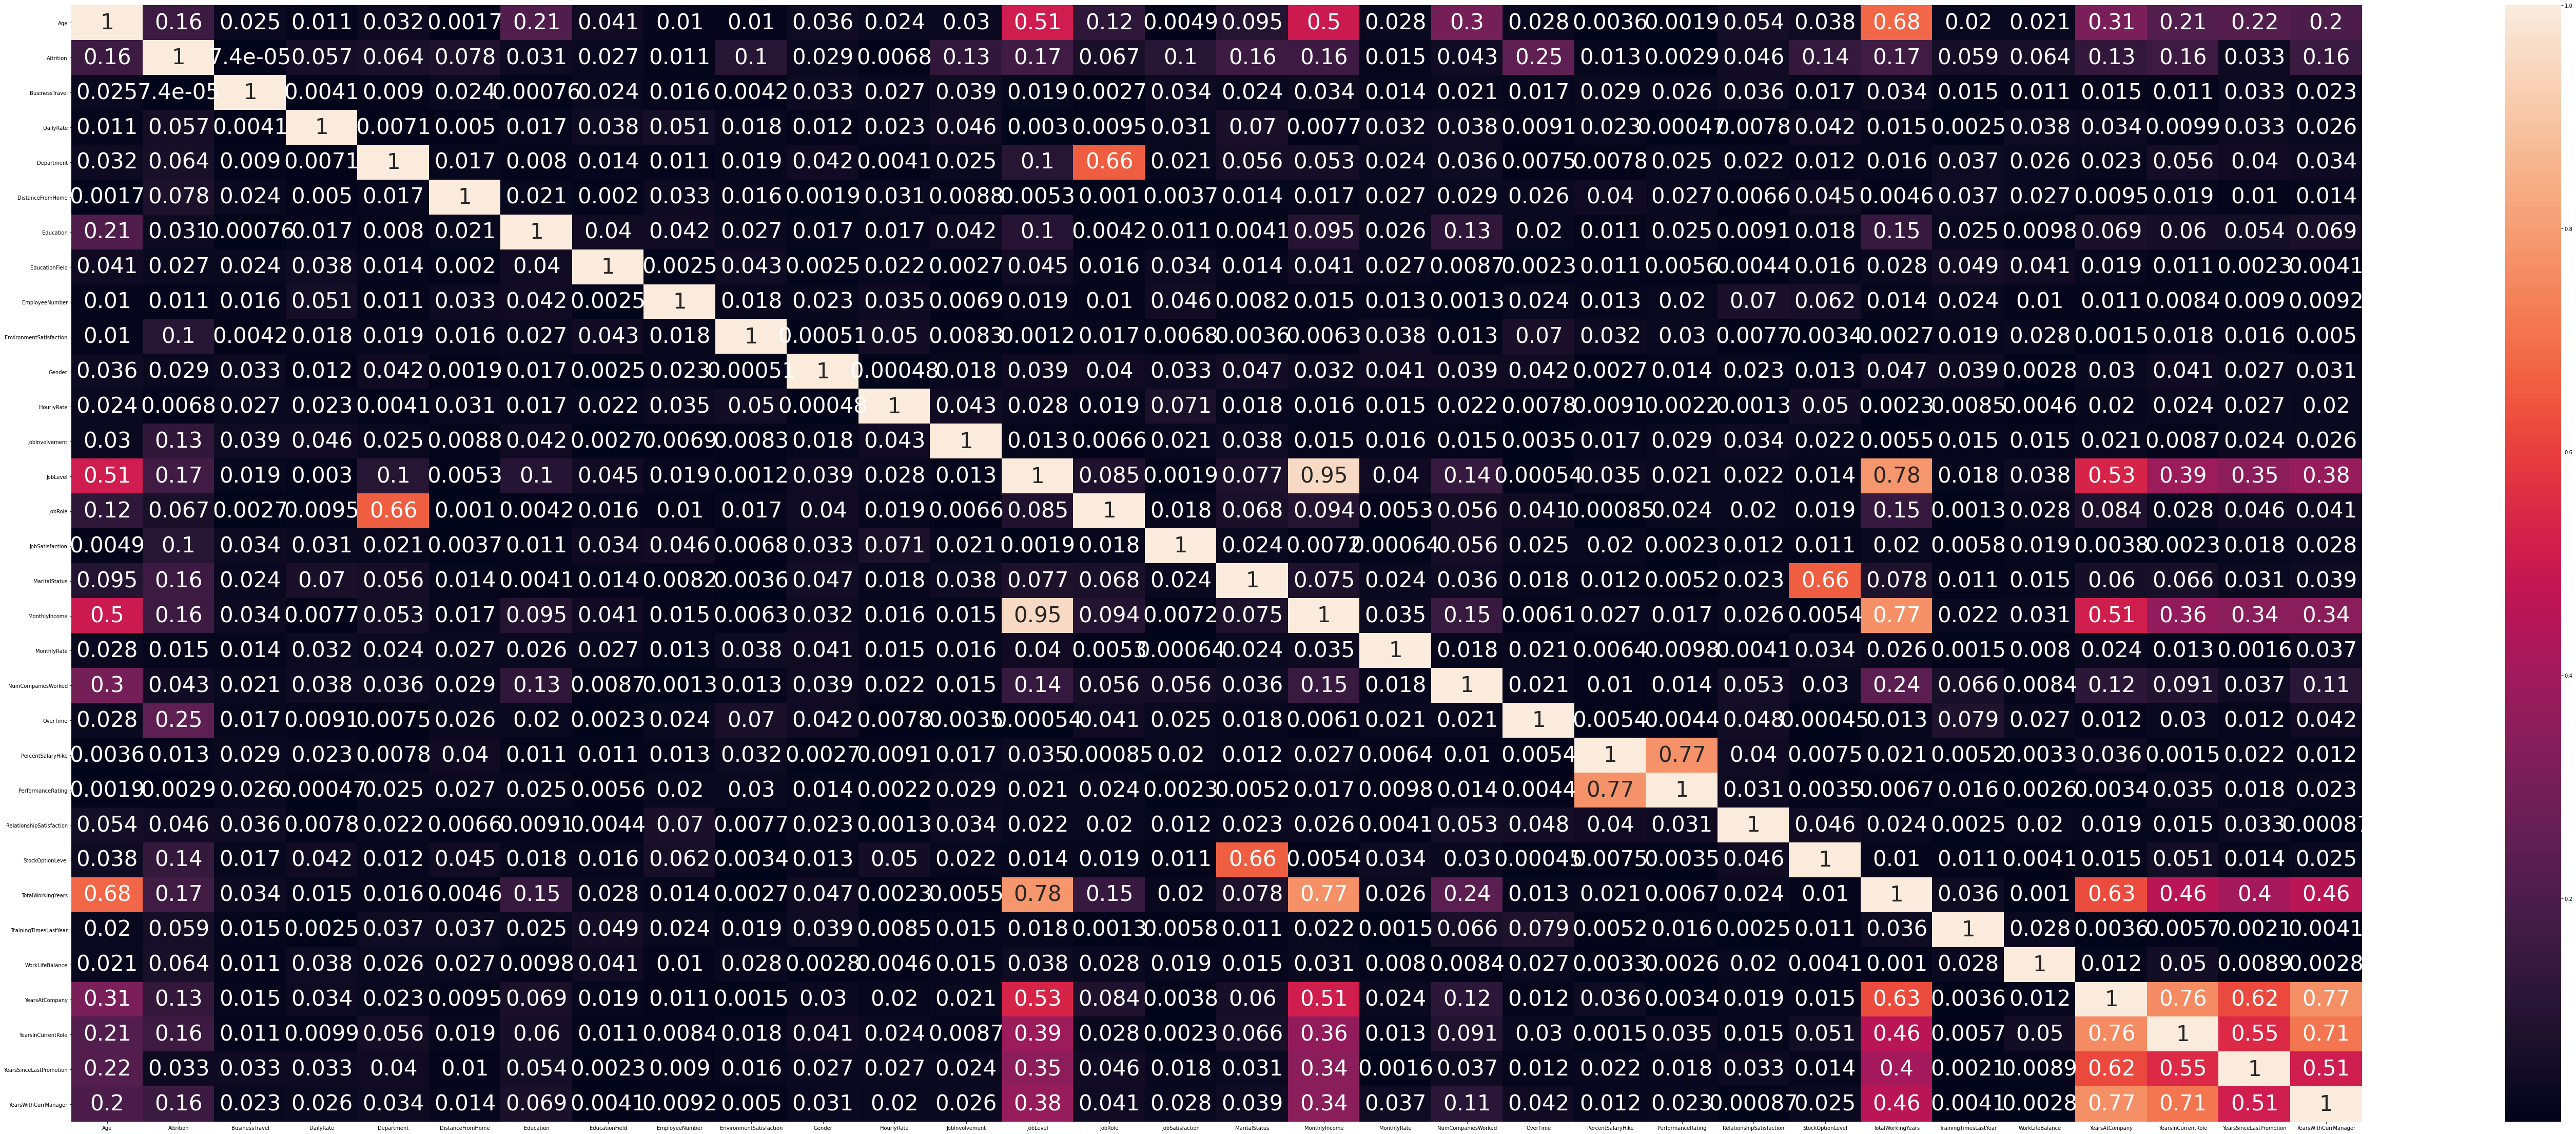

In [91]:
df_corr = df.corr().abs()

plt.figure(figsize = (100,40))
sns.heatmap(df_corr, annot = True, annot_kws = {'size': 42})
plt.show()

There seems to be a problem of multicolinearity here, hence we'll be using PCA .

In [93]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

In [94]:
Y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Target Data also seems imbalance

Applying PCA

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
pca  = PCA()

In [100]:
x_scaled = scale.fit_transform(X)

In [103]:
pca.fit_transform(x_scaled)

array([[-0.392964  ,  0.23630359, -1.77573851, ..., -0.46517513,
        -0.61203651,  0.00782657],
       [ 0.57893251, -1.3028011 ,  2.95364349, ..., -0.56074537,
        -0.41451703,  0.16347128],
       [-2.46430109,  1.22983485, -0.32867348, ...,  0.12049508,
        -0.0120931 ,  0.02941168],
       ...,
       [-1.24281443, -0.10223927,  2.55350468, ...,  0.03265146,
        -0.28839971,  0.0935071 ],
       [ 0.89671248, -0.71526355, -1.13343289, ..., -0.15159928,
         0.32694085,  0.03917939],
       [-1.17613295,  0.53018536, -0.60845358, ..., -0.19690939,
        -0.19337676,  0.29091853]])

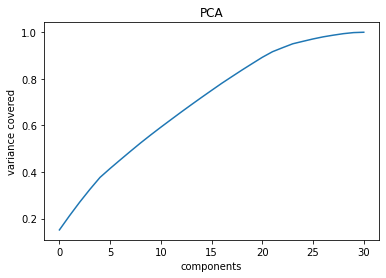

In [105]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

Looking at the above curve, the apt components are 25

In [109]:
pca = PCA(n_components = 25)
principle_components = pca.fit_transform(x_scaled)

In [110]:
df_comp = pd.DataFrame(principle_components, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25'])

In [111]:
df_comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25
0,-0.392964,0.236304,-1.775739,1.984536,0.974460,1.314296,-2.665549,-0.077257,0.217668,-3.209070,...,-0.687001,-0.530650,0.628932,1.352047,0.586915,0.810909,1.651030,-0.210440,-0.811698,0.366414
1,0.578933,-1.302801,2.953643,0.759909,-0.003700,1.192379,0.729243,0.714360,-0.326259,1.059381,...,0.907917,-0.893655,-0.917171,0.415243,0.547831,-0.148088,0.235740,-1.984705,0.243410,0.032615
2,-2.464301,1.229835,-0.328673,1.069394,-1.285547,1.403253,0.092819,-2.318801,0.245875,-0.079179,...,-1.218405,1.009195,-0.761397,0.920239,0.817273,-0.726590,1.518379,0.066115,0.101053,0.470764
3,-0.859846,-0.495665,-1.220481,-0.055405,-0.405273,2.111816,-0.685153,-0.359813,0.734064,-0.083535,...,-0.995431,0.457753,-0.169042,0.294989,-0.070446,-1.673394,-0.238331,0.177661,0.452489,-0.925610
4,-1.835542,1.256571,-0.559648,-0.313244,-1.024512,0.610879,0.478300,-1.445889,-1.167444,0.764610,...,1.043300,-2.275977,0.510219,0.160342,-0.750841,0.659885,2.216127,0.815696,-0.619726,0.361295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.720207,0.993720,0.572718,-0.606436,-0.498370,0.140469,-0.001767,0.562611,-0.310533,1.155256,...,0.304538,-0.158208,0.890457,-1.397341,0.213233,1.258474,0.791513,-0.392744,-0.121275,0.171581
1466,0.910277,0.537705,0.152415,-0.891703,-1.316752,-0.615981,3.698229,0.370553,0.787318,-0.551805,...,1.193863,-0.288587,-0.075285,-0.853569,-0.196847,-0.462781,1.087228,-0.393971,-0.825223,0.522222
1467,-1.242814,-0.102239,2.553505,0.120492,0.128495,-1.241851,-1.665478,0.973739,1.083647,0.185093,...,-0.222414,0.932068,1.960081,-0.659550,0.159907,0.215647,-0.543692,0.603959,-0.492486,-0.021777
1468,0.896712,-0.715264,-1.133433,0.407253,0.636058,-0.168760,0.335206,0.121007,-0.002530,1.234701,...,1.793236,1.107985,-0.383449,0.189086,-0.710151,0.403478,-0.716878,-2.030969,-0.084282,-0.509125


In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(df_comp, Y, test_size = 0.20, random_state = 42)

In [114]:
Y_train.value_counts()

0    978
1    198
Name: Attrition, dtype: int64

In [115]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [116]:
smote = SMOTE(0.80)

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [118]:
X_train_new,Y_train_new = smote.fit_resample(X_train,Y_train)

In [121]:
Y_train_new.value_counts()

0    978
1    782
Name: Attrition, dtype: int64

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Creating a function for the model:

In [170]:
lr = LogisticRegression()

In [171]:
lr.fit(X_train_new,Y_train_new)

LogisticRegression()

In [172]:
test_pred = lr.predict(X_test) 

In [175]:
acc = accuracy_score(Y_test,test_pred)
acc

0.7959183673469388

In [176]:
def model_result(model,f_train,f_test,t_train,t_test,train = True):
    if train:
        train_pred = model.predict(f_train)
        
        print("=================Train Result===============")
        
        print(f"Accuracy Score  : {accuracy_score(t_train,train_pred) * 100:.2f}%")
        
        
    elif train== False:
        test_pred = model.predict(f_test)
            
        print("=================Test Result===============")
        
        print(f"Accuracy Score  : {accuracy_score(t_test,test_pred) * 100:.2f}%")
        
        print("\n\nClassification Report\n", classification_report(t_test,test_pred,digits = 2))

Model Testing for SVC

In [178]:
svc = SVC()
svc.fit(X_train_new,Y_train_new)

SVC()

In [179]:
model_result(svc,X_train_new,X_test,Y_train_new,Y_test,train=True)
model_result(svc,X_train,X_test,Y_train,Y_test,train=False)

=================Train Result===============
Accuracy Score  : 95.80%
=================Test Result===============
Accuracy Score  : 86.05%


Classification Report
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       255
           1       0.47      0.44      0.45        39

    accuracy                           0.86       294
   macro avg       0.69      0.68      0.69       294
weighted avg       0.86      0.86      0.86       294



Model Testing for Random Forest

In [181]:
rf = RandomForestClassifier()
rf.fit(X_train_new,Y_train_new)

RandomForestClassifier()

In [182]:
model_result(rf,X_train_new,X_test,Y_train_new,Y_test,train=True)
model_result(rf,X_train,X_test,Y_train,Y_test,train=False)

=================Train Result===============
Accuracy Score  : 100.00%
=================Test Result===============
Accuracy Score  : 86.73%


Classification Report
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.50      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.70      0.61      0.63       294
weighted avg       0.84      0.87      0.85       294



Model Testing for Decision Tree:

In [183]:
dt = DecisionTreeClassifier()

In [184]:
dt.fit(X_train_new,Y_train_new)

DecisionTreeClassifier()

In [185]:
model_result(dt,X_train_new,X_test,Y_train_new,Y_test,train=True)
model_result(dt,X_train,X_test,Y_train,Y_test,train=False)

=================Train Result===============
Accuracy Score  : 100.00%
=================Test Result===============
Accuracy Score  : 70.07%


Classification Report
               precision    recall  f1-score   support

           0       0.87      0.76      0.82       255
           1       0.15      0.28      0.20        39

    accuracy                           0.70       294
   macro avg       0.51      0.52      0.51       294
weighted avg       0.78      0.70      0.73       294



Cross Validation:

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
for j in range(2,10):
    cv_score = cross_val_score(rf,df_comp,Y, cv=j)
    cv_mean = cv_score.mean()
    print(f"At CV {j}, the CV Score is {cv_mean}")
    print("\n")

At CV 2, the CV Score is 0.8551020408163266


At CV 3, the CV Score is 0.8523809523809525


At CV 4, the CV Score is 0.8516948525056274


At CV 5, the CV Score is 0.8496598639455784


At CV 6, the CV Score is 0.8510204081632654


At CV 7, the CV Score is 0.8510204081632652


At CV 8, the CV Score is 0.848984319315752


At CV 9, the CV Score is 0.8537375097677357




Hyper Parameter Tuning:

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
params = {'n_estimators':[10,11,12,13,14,15,16,17,18,19,20],
          'criterion': ['gini','entropy'],
         'max_depth': [10,15],
         'min_samples_leaf':[5,6]}

In [190]:
gscv = GridSearchCV(rf, param_grid = params, cv = 5, n_jobs = -1)

In [191]:
gscv.fit(X_train_new,Y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20]})

In [192]:
best_param = gscv.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 19}


In [199]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 12, min_samples_leaf = 5, n_estimators =  29)

In [200]:
rf.fit(X_train_new,Y_train_new)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, n_estimators=29)

In [201]:
model_result(rf,X_train_new,X_test,Y_train_new,Y_test,train=True)
model_result(rf,X_train,X_test,Y_train,Y_test,train=False)

=================Train Result===============
Accuracy Score  : 98.35%
=================Test Result===============
Accuracy Score  : 88.44%


Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.63      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.77      0.64      0.67       294
weighted avg       0.87      0.88      0.87       294



ROC AUC Curve:

In [207]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve 

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()


In [209]:
lr.fit(X_train_new,Y_train_new)
knn.fit(X_train_new,Y_train_new)
dt.fit(X_train_new,Y_train_new)
rf.fit(X_train_new,Y_train_new)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, n_estimators=29)

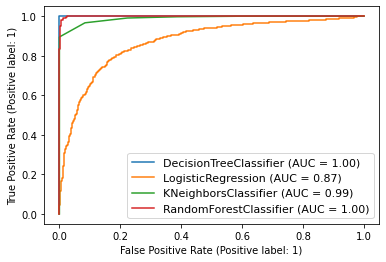

In [210]:
disp = plot_roc_curve(dt,X_train_new,Y_train_new)
plot_roc_curve(lr,X_train_new,Y_train_new, ax = disp.ax_)
plot_roc_curve(knn,X_train_new,Y_train_new, ax = disp.ax_)
plot_roc_curve(rf,X_train_new,Y_train_new, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

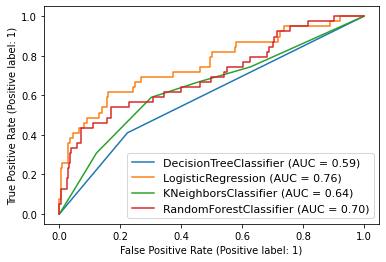

In [213]:
disp = plot_roc_curve(dt,X_test,Y_test)
plot_roc_curve(lr,X_test,Y_test, ax = disp.ax_)
plot_roc_curve(knn,X_test,Y_test, ax = disp.ax_)
plot_roc_curve(rf,X_test,Y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

Saving The Model:


In [214]:
import pickle
filename = 'HR Analytics.pkl'
pickle.dump(rf,open(filename,'wb'))